In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# #checking the structure to visualize in each column will be merged
mouse_drug_data.head()
clinical_trial.head()

# Combine the data into a single dataset

merge_data = pd.merge(mouse_drug_data,clinical_trial,on="Mouse ID")

# checking if there is difference between lines
merge_data.count()


# Display the data table for preview
merge_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_value = merge_data.groupby(["Drug","Timepoint"])
mean_tumor = group_value["Tumor Volume (mm3)"].mean()
mean_tumor

# Convert to DataFrame
tumor_mean_df = pd.DataFrame({ "Tumor Volume (mm3)" : mean_tumor
})

# Preview DataFrame
#reset the index'
tumor_mean_df.reset_index(inplace=True) 
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = group_value["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
std_error_df = pd.DataFrame({"Tumor Volume (mm3)": std_error})

# Preview DataFrame
std_error_df.reset_index(inplace=True)
std_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
b = tumor_mean_df[["Drug", "Timepoint","Tumor Volume (mm3)"]]

format_frame = b.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
format_frame.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


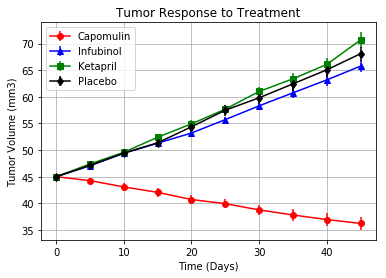

In [5]:
# Generate the Plot (with Error Bars)
plt_Capomulin = b.loc[b["Drug"]=='Capomulin']
plt_Capomulin_std_error = std_error_df.loc[std_error_df["Drug"]=='Capomulin']
plt_Infubinol = b.loc[b["Drug"]=='Infubinol']
plt_Infubinol_std_error = std_error_df.loc[std_error_df["Drug"]=='Infubinol']
plt_Ketapril = b.loc[b["Drug"]=='Ketapril']
plt_Ketapril_std_error = std_error_df.loc[std_error_df["Drug"]=='Ketapril']
plt_Placebo = b.loc[b["Drug"]=='Placebo']
plt_Placebo_std_error = std_error_df.loc[std_error_df["Drug"]=='Placebo']

# plt.plot(plt_Capomulin["Timepoint"], plt_Capomulin["Tumor Volume (mm3)"], color = "red", label = "Capomulin")
# plt.plot(plt_Infubinol["Timepoint"], plt_Infubinol["Tumor Volume (mm3)"], color = "blue", label = "Infubinol")
# plt.plot(plt_Ketapril["Timepoint"], plt_Ketapril["Tumor Volume (mm3)"], color = "green", label = "Ketapril")
# plt.plot(plt_Placebo["Timepoint"], plt_Placebo["Tumor Volume (mm3)"], color = "black", label = "Placebo")

# fig, ax = plt.subplots()

plt.errorbar(plt_Capomulin["Timepoint"], plt_Capomulin["Tumor Volume (mm3)"],
            plt_Capomulin_std_error["Tumor Volume (mm3)"], fmt="o", color = "red", ls='-',label = "Capomulin"
             )

plt.errorbar(plt_Infubinol["Timepoint"], plt_Infubinol["Tumor Volume (mm3)"],
            plt_Infubinol_std_error["Tumor Volume (mm3)"], fmt="^", color = "blue", ls='-', label = "Infubinol"
             )
plt.errorbar(plt_Ketapril["Timepoint"], plt_Ketapril["Tumor Volume (mm3)"],
            plt_Ketapril_std_error["Tumor Volume (mm3)"], fmt="s", color = "green", ls='-', label = "Ketapril"
             )
plt.errorbar(plt_Placebo["Timepoint"], plt_Placebo["Tumor Volume (mm3)"],
            plt_Placebo_std_error["Tumor Volume (mm3)"], fmt="d", color = "black", ls='-', label = "Placebo"
             )

plt.legend(loc="best")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Save the Figure
plt.savefig("./png/Tumor_response_treatment.png")
# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_site = merge_data.groupby(["Drug","Timepoint"])
met_site_mean = met_site["Metastatic Sites"].mean()
met_site_mean

# Convert to DataFrame

met_site_df = pd.DataFrame({"Metastatic Sites": met_site_mean})

# Preview DataFrame
met_site_df.reset_index(inplace=True) 
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
st_met_sit = merge_data.groupby(["Drug","Timepoint"])

met_sit_st_err = st_met_sit["Metastatic Sites"].sem()

# Convert to DataFrame
df_met_sit_err = pd.DataFrame({
                                "Metastatic Sites": met_sit_st_err
})
# Preview DataFrame
#reset the index'
df_met_sit_err.reset_index(inplace=True) 
df_met_sit_err.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
format_frame_met_sit = met_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
format_frame_met_sit.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


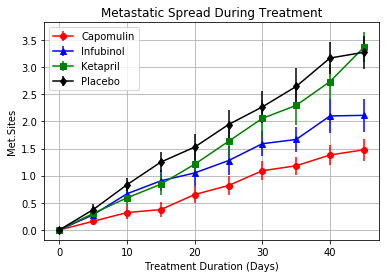

In [9]:
# Generate the Plot (with Error Bars)
plt_Capomulin = met_site_df.loc[met_site_df["Drug"]=="Capomulin"]
plt_Capomulin_std_error = df_met_sit_err.loc[df_met_sit_err["Drug"] == "Capomulin"]

plt_Infubinol = met_site_df.loc[met_site_df["Drug"]=="Infubinol"]
plt_Infubinol_std_error  = df_met_sit_err.loc[df_met_sit_err["Drug"] == "Infubinol"]

plt_Ketapril = met_site_df.loc[met_site_df["Drug"]=="Ketapril"]
plt_Ketapril_std_error  = df_met_sit_err.loc[df_met_sit_err["Drug"] == "Ketapril"]

plt_Placebo = met_site_df.loc[met_site_df["Drug"]=="Placebo"]
plt_Placebo_std_error  = df_met_sit_err.loc[df_met_sit_err["Drug"] == "Placebo"]


plt.errorbar(plt_Capomulin["Timepoint"], plt_Capomulin["Metastatic Sites"],
            plt_Capomulin_std_error["Metastatic Sites"], fmt="o", color = "red", ls='-',label = "Capomulin"
             )
plt.errorbar(plt_Infubinol["Timepoint"], plt_Infubinol["Metastatic Sites"],
            plt_Infubinol_std_error["Metastatic Sites"], fmt="^", color = "blue", ls='-', label = "Infubinol"
             )
plt.errorbar(plt_Ketapril["Timepoint"], plt_Ketapril["Metastatic Sites"],
            plt_Ketapril_std_error["Metastatic Sites"], fmt="s", color = "green", ls='-', label = "Ketapril"
             )
plt.errorbar(plt_Placebo["Timepoint"], plt_Placebo["Metastatic Sites"],
            plt_Placebo_std_error["Metastatic Sites"], fmt="d", color = "black", ls='-', label = "Placebo"
             )

plt.legend(loc="best")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.grid()
# Save the Figure
plt.savefig("./png/Metastatic_spread_during_treatment.png")
# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = merge_data.groupby(["Drug","Timepoint"])

mice_count = mice_group["Mouse ID"].count()

# Convert to DataFrame
df_mice = pd.DataFrame({
                                "Mouse Count": mice_count
})
# Preview DataFrame
#reset the index'
df_mice.reset_index(inplace=True) 
df_mice.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
#Convert to percent

#mice_group = merge_data.groupby(["Drug","Timepoint"])

max_count = mice_group["Mouse ID"].count().max()
percent_value = mice_group["Mouse ID"].count()/max_count*100
percent_value
# Convert to DataFrame
df_mice_perc = pd.DataFrame({
                                "Percent": percent_value
})

# Preview DataFrame
#reset the index'
df_mice_perc.reset_index(inplace=True) 
df_mice_perc.head()

,Drug,Timepoint,Percent
0,Capomulin,0,96.153846
1,Capomulin,5,96.153846
2,Capomulin,10,96.153846
3,Capomulin,15,92.307692
4,Capomulin,20,88.461538


In [12]:
# Minor Data Munging to Re-Format the Data Frames
format_frame_mice = df_mice.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview that Reformatting worked
format_frame_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


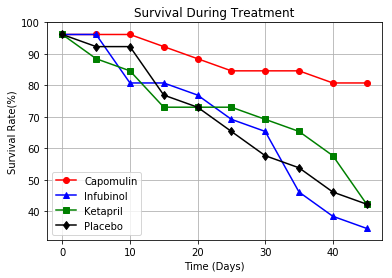

In [13]:
# Generate the Plot (Accounting for percentages)

plt_Capomulin = df_mice.loc[df_mice["Drug"]=="Capomulin"]
plt_Capomulin_perc = df_mice_perc.loc[df_mice_perc["Drug"] == "Capomulin"]
plt_Infubinol = df_mice.loc[df_mice["Drug"]=="Infubinol"]
plt_Infubinol_perc = df_mice_perc.loc[df_mice_perc["Drug"] == "Infubinol"]
plt_Ketapril = df_mice.loc[df_mice["Drug"]=="Ketapril"]
plt_Ketapril_perc = df_mice_perc.loc[df_mice_perc["Drug"] == "Ketapril"]
plt_Placebo = df_mice.loc[df_mice["Drug"]=="Placebo"]
plt_Placebo_perc = df_mice_perc.loc[df_mice_perc["Drug"] == "Placebo"]

plt.plot(plt_Capomulin["Timepoint"], plt_Capomulin_perc["Percent"], color = "red", marker="o",label = "Capomulin")
plt.plot(plt_Infubinol["Timepoint"], plt_Infubinol_perc["Percent"], color = "blue", marker="^", label = "Infubinol")
plt.plot(plt_Ketapril["Timepoint"], plt_Ketapril_perc["Percent"], color = "green", marker="s",label = "Ketapril")
plt.plot(plt_Placebo["Timepoint"], plt_Placebo_perc["Percent"], color = "black", marker="d", label = "Placebo")

plt.legend(loc="best")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.grid()
plt.ylim(31,100)
# Save the Figure
plt.savefig("./png/Survival_during_treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
begin = tumor_mean_df.loc[(tumor_mean_df["Timepoint"]==0),:]
begin= begin.set_index("Drug")
last = tumor_mean_df.loc[(tumor_mean_df["Timepoint"]==45),:]
last=last.set_index("Drug")
# # a = (last["Tumor Volume (mm3)"]-begin["Tumor Volume (mm3)"])/begin["Tumor Volume (mm3)"]
# # a.head()

result_df = pd.DataFrame({
                             "Begin": begin["Tumor Volume (mm3)"],
                             "Last" : last["Tumor Volume (mm3)"]
})
result_df["Percent"] = (result_df["Last"] - result_df["Begin"]) / result_df["Begin"]*100
# # Display the data to confirm
result_df["Percent"]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: Percent, dtype: float64

In [15]:
result_df.reset_index(inplace=True) 
result_df_result =result_df[["Drug", "Percent"]]
result_df_result

,Drug,Percent
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


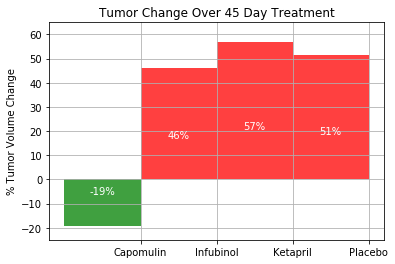

In [16]:

# Store all Relevant Percent Changes into a Tuple

plt_Capomulin = result_df_result.loc[result_df_result["Drug"]=="Capomulin"]
plt_Infubinol = result_df_result.loc[result_df_result["Drug"]=="Infubinol"]
plt_Ketapril = result_df_result.loc[result_df_result["Drug"]=="Ketapril"]
plt_Placebo = result_df_result.loc[result_df_result["Drug"]=="Placebo"]

# Splice the data between passing and failing drugs

Capomulin = plt.bar(plt_Capomulin["Drug"],plt_Capomulin["Percent"], color = "green",alpha=0.75, align="edge",width= -1)
Infubinol = plt.bar(plt_Infubinol["Drug"],plt_Infubinol["Percent"], color = "red",alpha=0.75, align="edge",width= -1)
Ketapril = plt.bar(plt_Ketapril["Drug"],plt_Ketapril["Percent"], color = "red",alpha=0.75, align="edge",width= -1)
Placebo = plt.bar(plt_Placebo["Drug"],plt_Placebo["Percent"], color = "red",alpha=0.75, align="edge",width= -1)


# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-25,65)
plt.grid()
# Use functions to label the percentages of changes

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height/3,
                '%d%%' % int(height), color = "white",
                ha='center', va='bottom')

        
# Call functions to implement the function calls
autolabel(Capomulin)
autolabel(Infubinol)
autolabel(Ketapril)
autolabel(Placebo)

# Save the Figure

plt.savefig("./png/Tumor_change_over_45_day_treatment.png")
# Show the Figure
plt.show()